# Analysis of Impact of COVID-19 on Indian Agriculture sector

1. Analysis of NABARD all india survey data.
2. Analysis APMC Market Data-Maharashtra State
3. Predict the Future price of Wheat crop.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import lag_plot
from pandas import DataFrame
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Indian State Survey Data-Impact of COVID-19 on Indian Agriculture sector(By National Bank for Agriculture & Rural Development) 

In [2]:
#import dataset
df = pd.read_csv('India State Survey Data.csv')

In [3]:
df.columns

Index(['State/U.T.', 'Non Aspirational District', 'Aspirational District',
       'Total Districts covered', 'Agricultural production Decreased',
       'Agricultural production Increased',
       'Agricultural production Remained same',
       'Agricultural production Total Districts Covered', 'Agriculture',
       'Horticulture', 'Poultry', 'Dairy', 'Fisheries', 'Pig/Sheep/Goat',
       'supply of Agri-inputs Decreased', 'supply of Agri-inputs Increased',
       'supply of Agri-inputs Remained the same',
       'supply of Agri-inputs Total Districts Covered',
       'State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Seeds',
       'State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Fertilizers',
       'State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Pesticides',
       'State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Rental Agri- Machinery',
       'State-wise Increase/

In [4]:
df1=df.drop(['Non Aspirational District',
             'Aspirational District',
             'No of districts per state',
             'Horticulture','Fisheries',
             'Pig/Sheep/Goat','Agricultural production Total Districts Covered',
             'supply of Agri-inputs Total Districts Covered',
             'Demand or Agri/Rural Labour (No.) Total districts covered',
             ], axis=1)

In [5]:
indian_survey=df1.rename({
    "State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Seeds":"supply_Seeds",
    "State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Fertilizers":"supply_Fertilizers",
    "State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Pesticides":"supply_Pesticides",
    "State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Rental Agri- Machinery":"supply_Agri- Machinery",
    "State-wise Increase/Decrease in magnitude of quantity supplied of Agri-inputs Fodder/Cattle feed":"supply_Fodder/Cattle_feed",
    "Farmers Ability to Take Produce to APMC (No.) Favourably Impacted": "APMC_Favourably_Impacted", 
    "Farmers Ability to Take Produce to APMC (No.) Adversely Impacted": "APMC_Adversely_Impacted", 
    "Farmers Ability to Take Produce to APMC (No.) No Impact": "APMC_No_Impact",
    "Farmers Ability to Take Produce to APMC (No.) Total districts covered":"APMC_Total_District"}, 
          axis = "columns", inplace = False)

In [6]:
indian_survey.duplicated().sum()

0

In [7]:
indian_survey.isnull().sum()

State/U.T.                                         0
Total Districts covered                            0
Agricultural production Decreased                  0
Agricultural production Increased                  0
Agricultural production Remained same              0
Agriculture                                        0
Poultry                                            0
Dairy                                              0
supply of Agri-inputs Decreased                    0
supply of Agri-inputs Increased                    0
supply of Agri-inputs Remained the same            0
supply_Seeds                                       0
supply_Fertilizers                                 0
supply_Pesticides                                  0
supply_Agri- Machinery                             0
supply_Fodder/Cattle_feed                          0
Demand or Agri/Rural Labour (No.) Decreased        0
Demand or Agri/Rural Labour (No.) Increased        0
Demand or Agri/Rural Labour (No.) Remained sam

In [8]:
indian_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   State/U.T.                                       34 non-null     object 
 1   Total Districts covered                          34 non-null     int64  
 2   Agricultural production Decreased                34 non-null     int64  
 3   Agricultural production Increased                34 non-null     int64  
 4   Agricultural production Remained same            34 non-null     int64  
 5   Agriculture                                      34 non-null     float64
 6   Poultry                                          34 non-null     float64
 7   Dairy                                            34 non-null     float64
 8   supply of Agri-inputs Decreased                  34 non-null     int64  
 9   supply of Agri-inputs Increased   

In [9]:
indian_survey.head()

,State/U.T.,Total Districts covered,Agricultural production Decreased,Agricultural production Increased,Agricultural production Remained same,Agriculture,Poultry,Dairy,supply of Agri-inputs Decreased,supply of Agri-inputs Increased,...,supply_Fodder/Cattle_feed,Demand or Agri/Rural Labour (No.) Decreased,Demand or Agri/Rural Labour (No.) Increased,Demand or Agri/Rural Labour (No.) Remained same,APMC_Favourably_Impacted,APMC_Adversely_Impacted,APMC_No_Impact,APMC_Total_District,Marketing Impact Score,Final Score of the State
0,Andaman & Nicobar,3,3,0,0,-21.7,-15.0,-20.0,2,0,...,-50.0,0,2,1,0,0,3,3,-13,-4.33
1,Andhra Pradesh,13,6,4,3,-2.0,-15.9,-0.8,7,1,...,-7.5,2,10,1,5,5,3,13,-46,-3.54
2,Arunachal Pradesh,9,0,0,9,0.0,15.0,-5.0,9,0,...,-3.9,0,6,3,1,0,8,9,-31,-3.44
3,Assam,16,12,2,2,-4.2,-2.3,-9.0,15,1,...,-9.4,5,7,4,1,11,4,16,-76,-4.75
4,Bihar,37,24,8,5,-5.3,-29.9,-10.0,28,2,...,-17.6,11,17,9,4,25,8,37,-164,-4.43


In [10]:
indian_survey.tail()

,State/U.T.,Total Districts covered,Agricultural production Decreased,Agricultural production Increased,Agricultural production Remained same,Agriculture,Poultry,Dairy,supply of Agri-inputs Decreased,supply of Agri-inputs Increased,...,supply_Fodder/Cattle_feed,Demand or Agri/Rural Labour (No.) Decreased,Demand or Agri/Rural Labour (No.) Increased,Demand or Agri/Rural Labour (No.) Remained same,APMC_Favourably_Impacted,APMC_Adversely_Impacted,APMC_No_Impact,APMC_Total_District,Marketing Impact Score,Final Score of the State
29,Tripura,6,0,0,6,-5.0,-23.3,-15.0,2,0,...,-20.0,2,0,4,0,0,6,6,-22,-3.67
30,Uttar Pradesh,65,28,18,19,0.0,-24.7,-5.8,40,5,...,-5.6,19,28,18,15,28,22,65,-201,-3.09
31,Uttarakhand,12,8,2,2,0.6,-8.6,0.7,7,0,...,-16.0,4,3,5,0,6,6,12,-52,-4.33
32,West Bengal,17,12,1,4,-1.4,-14.4,-11.9,14,0,...,-19.7,2,9,6,2,7,8,17,-68,-4.00
33,All India,560,263,108,189,-2.7,-19.6,-6.6,323,26,...,-10.8,139,244,177,68,247,245,560,-1885,-3.37


In [11]:
indian_survey.describe()

,Total Districts covered,Agricultural production Decreased,Agricultural production Increased,Agricultural production Remained same,Agriculture,Poultry,Dairy,supply of Agri-inputs Decreased,supply of Agri-inputs Increased,supply of Agri-inputs Remained the same,...,supply_Fodder/Cattle_feed,Demand or Agri/Rural Labour (No.) Decreased,Demand or Agri/Rural Labour (No.) Increased,Demand or Agri/Rural Labour (No.) Remained same,APMC_Favourably_Impacted,APMC_Adversely_Impacted,APMC_No_Impact,APMC_Total_District,Marketing Impact Score,Final Score of the State
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,32.941176,15.470588,6.352941,11.117647,-2.855882,-12.767647,-5.382353,19.000000,1.529412,12.411765,...,-11.585294,8.176471,14.352941,10.411765,4.000000,14.529412,14.411765,32.941176,-110.882353,-3.219118
std,94.240807,44.401225,18.631811,31.822200,7.846180,11.611612,6.336258,54.387499,4.534282,35.688142,...,10.034037,23.580257,41.349862,29.838066,11.669697,41.816508,41.256858,94.240807,317.690698,1.177227
min,1.000000,0.000000,0.000000,0.000000,-21.700000,-33.300000,-20.000000,0.000000,0.000000,0.000000,...,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1885.000000,-4.750000
25%,7.250000,0.250000,0.000000,2.000000,-7.075000,-21.400000,-9.375000,5.250000,0.000000,1.000000,...,-14.800000,1.000000,1.000000,1.250000,0.000000,0.250000,3.000000,7.250000,-80.500000,-4.160000
50%,13.000000,6.500000,1.500000,4.000000,-1.050000,-14.700000,-5.400000,9.500000,0.000000,4.500000,...,-9.300000,2.500000,5.500000,4.000000,1.000000,6.000000,6.000000,13.000000,-46.000000,-3.350000
75%,22.750000,12.750000,4.000000,9.750000,0.000000,-1.625000,0.000000,11.750000,1.000000,12.000000,...,-5.725000,6.000000,11.500000,7.750000,3.000000,11.750000,10.500000,22.750000,-22.000000,-3.000000
max,560.000000,263.000000,108.000000,189.000000,23.300000,15.000000,4.200000,323.000000,26.000000,211.000000,...,0.000000,139.000000,244.000000,177.000000,68.000000,247.000000,245.000000,560.000000,0.000000,0.000000


## Visualization 

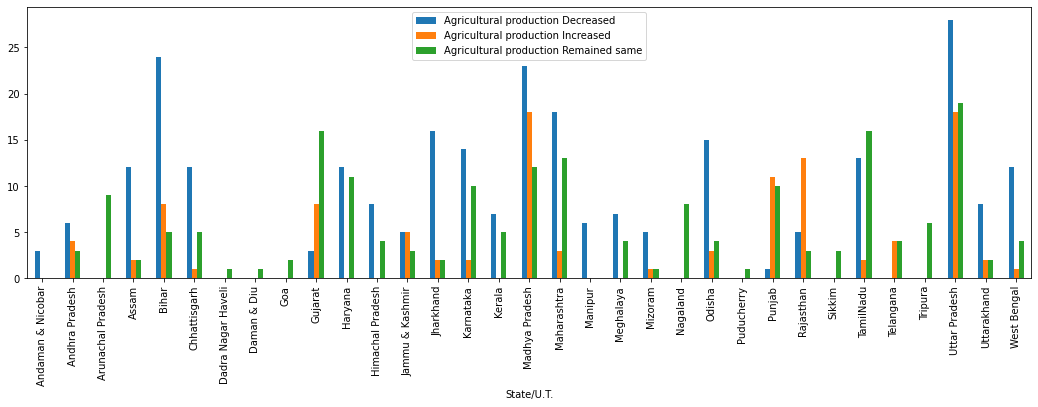

In [12]:
df5=indian_survey.iloc[0:33]
df5.plot(x="State/U.T.", y=["Agricultural production Decreased","Agricultural production Increased","Agricultural production Remained same"], kind="bar",fontsize=10,figsize=(18,5))

### Impact of COVID-19 on Agriculture Sector-->Agricultural production Decreased due to lockdown

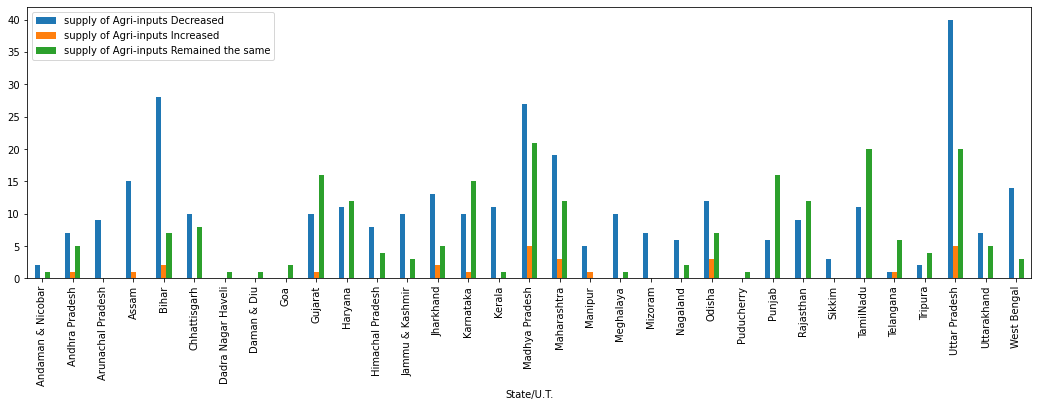

In [13]:
df5.plot(x="State/U.T.", y=["supply of Agri-inputs Decreased","supply of Agri-inputs Increased","supply of Agri-inputs Remained the same"], kind="bar",fontsize=10,figsize=(18,5))

### Impact of COVID-19 on Agriculture Sector-->supply of Agri-inputs Decreased due to lockdown

In [14]:
agriculture_production_decrease=df5.nlargest(5,['Agricultural production Decreased','supply of Agri-inputs Decreased'])
agri_decr=agriculture_production_decrease.loc[:,["State/U.T.","Agricultural production Decreased","supply of Agri-inputs Decreased"]]
agri_decr

,State/U.T.,Agricultural production Decreased,supply of Agri-inputs Decreased
30,Uttar Pradesh,28,40
4,Bihar,24,28
16,Madhya Pradesh,23,27
17,Maharashtra,18,19
13,Jharkhand,16,13


### These are the 5 States that are affected most due to the COVID 19 lockdown

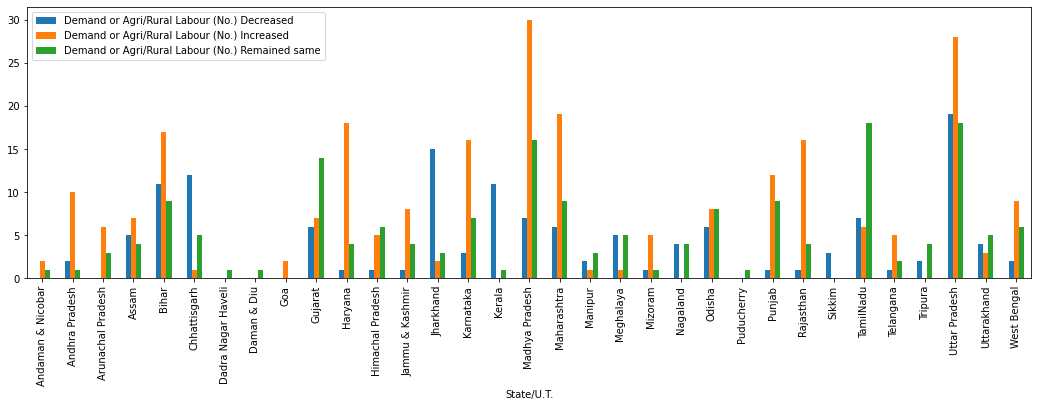

In [15]:
df5.plot(x="State/U.T.", y=["Demand or Agri/Rural Labour (No.) Decreased","Demand or Agri/Rural Labour (No.) Increased","Demand or Agri/Rural Labour (No.) Remained same"], kind="bar",fontsize=10,figsize=(18,5))

### Due to the lockdown Demand of Labour increase in the states

In [16]:
agri_labour=df5.nlargest(5,['Demand or Agri/Rural Labour (No.) Increased'])
agri_labour_increase=agri_labour.loc[:,["State/U.T.","Demand or Agri/Rural Labour (No.) Increased"]]
agri_labour_increase

,State/U.T.,Demand or Agri/Rural Labour (No.) Increased
16,Madhya Pradesh,30
30,Uttar Pradesh,28
17,Maharashtra,19
10,Haryana,18
4,Bihar,17


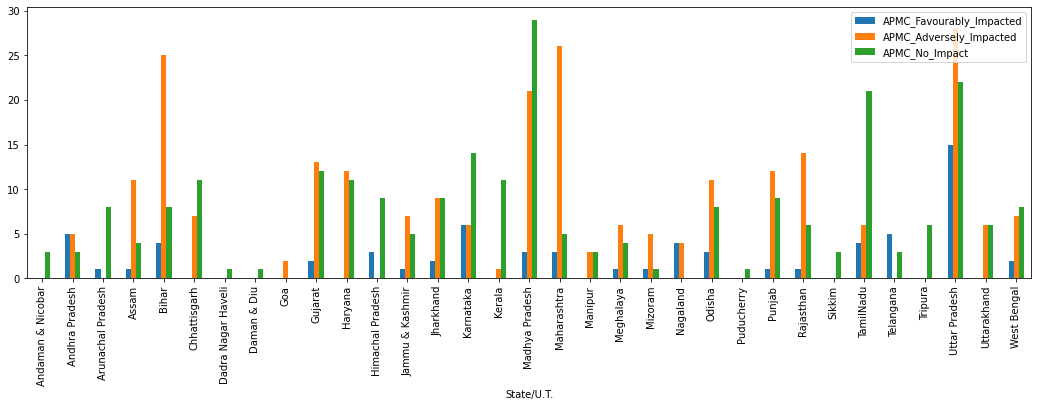

In [17]:
df5.plot(x="State/U.T.", y=["APMC_Favourably_Impacted","APMC_Adversely_Impacted","APMC_No_Impact"], kind="bar",fontsize=10,figsize=(18,5))

## These are the 5 States where APMC market affected most due to the COVID 19 lockdown

#### Note:-There are about 2477 principal regulated markets based on geography (the APMCs) and 4843 sub-market yards regulated by the respective APMCs in India.

#### APMC:Agricultural Produce Market Committee 

In [18]:
apmc=df5.nlargest(10,['APMC_Adversely_Impacted'])
agri_impact=apmc.loc[:,["State/U.T.","APMC_Adversely_Impacted"]]
agri_impact

,State/U.T.,APMC_Adversely_Impacted
30,Uttar Pradesh,28
17,Maharashtra,26
4,Bihar,25
16,Madhya Pradesh,21
25,Rajasthan,14
9,Gujarat,13
10,Haryana,12
24,Punjab,12
3,Assam,11
22,Odisha,11


### These are the States that are affected most due to the COVID 19 lockdown

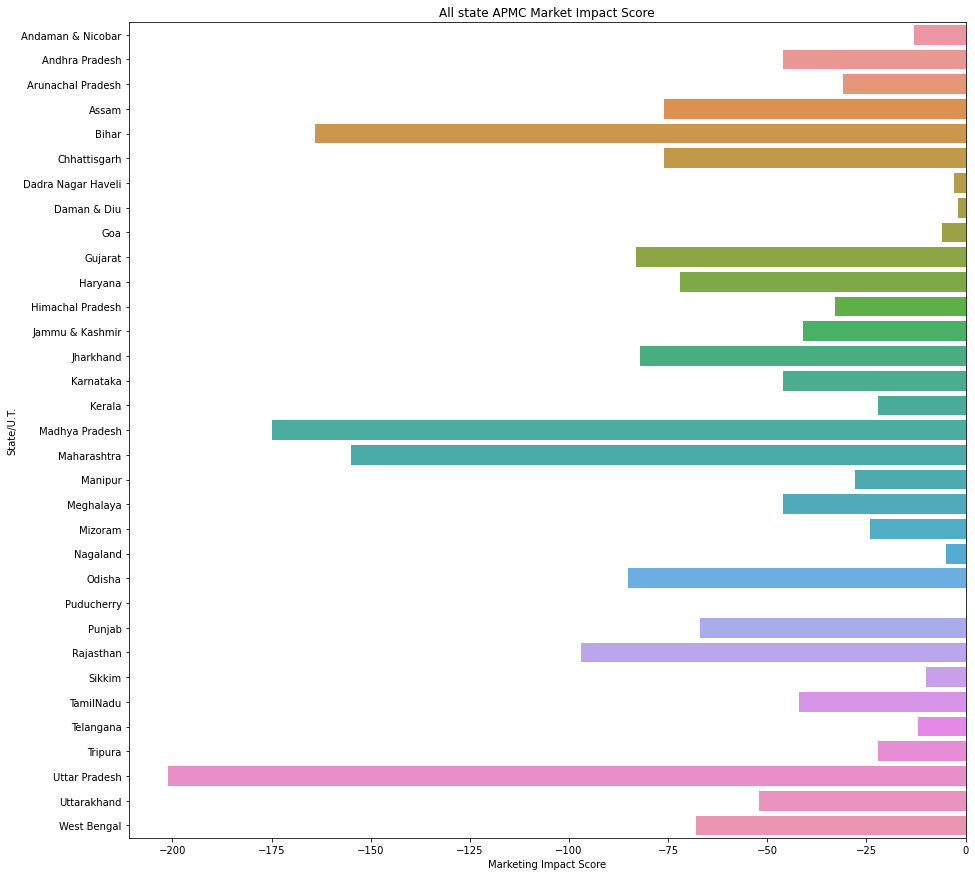

In [19]:
plt.figure(figsize= (15,15))
marketing_impact=sns.barplot(x=df5['Marketing Impact Score'],y=df5["State/U.T."],orient='h');
marketing_impact.set_title('All state APMC Market Impact Score');

In [20]:
apmc_score=df5.nlargest(10,['APMC_Adversely_Impacted','Marketing Impact Score'])
score_impact=apmc_score.loc[:,["State/U.T.","APMC_Adversely_Impacted","Marketing Impact Score"]]
score_impact

,State/U.T.,APMC_Adversely_Impacted,Marketing Impact Score
30,Uttar Pradesh,28,-201
17,Maharashtra,26,-155
4,Bihar,25,-164
16,Madhya Pradesh,21,-175
25,Rajasthan,14,-97
9,Gujarat,13,-83
24,Punjab,12,-67
10,Haryana,12,-72
3,Assam,11,-76
22,Odisha,11,-85


# Summary of  visualization

In [21]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["State/U.T.", "Agriculture Impact","Supply of Agri-inputs Impact","Labor Impact","APMC Market Impact"]
x.add_row(["Uttar Pradesh", "Yes", "Yes", "Yes","Impacted"])
x.add_row(["Maharashtra", "Yes", "Yes", "Yes","Impacted"])
x.add_row(["Bihar", "Yes", "Yes", "Yes","Impacted"])
x.add_row(["Madhya Pradesh", "Yes", "Yes", "Yes","Impacted"])
print(x)

+----------------+--------------------+------------------------------+--------------+--------------------+
|   State/U.T.   | Agriculture Impact | Supply of Agri-inputs Impact | Labor Impact | APMC Market Impact |
+----------------+--------------------+------------------------------+--------------+--------------------+
| Uttar Pradesh  |        Yes         |             Yes              |     Yes      |      Impacted      |
|  Maharashtra   |        Yes         |             Yes              |     Yes      |      Impacted      |
|     Bihar      |        Yes         |             Yes              |     Yes      |      Impacted      |
| Madhya Pradesh |        Yes         |             Yes              |     Yes      |      Impacted      |
+----------------+--------------------+------------------------------+--------------+--------------------+


### Summary of visualization
#### 1) The lockdown in response to COVID-19 has seriously disrupted Indian farms.
#### 2) Farms have been less profitable amid rising food prices, putting pressure on food security.
#### 3) A lack of migrant labor has led to a loss of produce and affected the spring harvest.
#### 4) During the lockdown, farmers did not get the right price for their crops.


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### APMC Market Data Year 2020-21

#### Crop Name:- Wheat Maharashtra State APMC Market Data 2020-21

In [22]:
maha_wheat=pd.read_csv("Maharashtra_2020_Wheat.csv")
maha_wheat.head(5)

,Market,Arrival_Date,Arrivals,Variety,Minimum_2020Price,Maximum_2020Price,Modal_2020Price
0,Achalpur,2/1/2020,10.0,Other,2180,2300,2240
1,NaN,9/1/2020,19.0,Other,2220,2400,2310
2,NaN,16/01/2020,10.0,Other,2250,2400,2325
3,NaN,23/01/2020,15.0,Other,2080,2300,2190
4,NaN,27/01/2020,21.0,Other,2050,2250,2150


In [23]:
maha_wheat.shape

(17438, 7)

In [24]:
maha_wheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Market             1713 non-null   object 
 1   Arrival_Date       17022 non-null  object 
 2   Arrivals           17022 non-null  float64
 3   Variety            17377 non-null  object 
 4   Minimum_2020Price  17438 non-null  int64  
 5   Maximum_2020Price  17438 non-null  int64  
 6   Modal_2020Price    17438 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 953.8+ KB


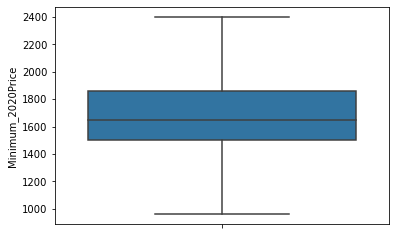

In [25]:
sns.boxplot(y="Minimum_2020Price",data=maha_wheat,showfliers=False)
plt.show()

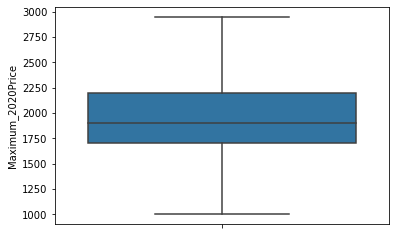

In [26]:
sns.boxplot(y="Maximum_2020Price",data=maha_wheat,showfliers=False)
plt.show()

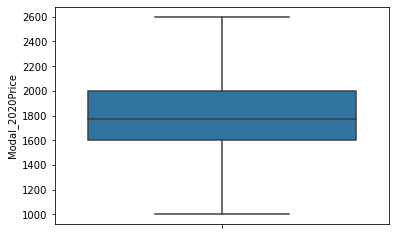

In [27]:
sns.boxplot(y="Modal_2020Price",data=maha_wheat,showfliers=False)
plt.show()

In [28]:
maha_wheat['Arrivals'] = maha_wheat['Arrivals'].fillna(0)
maha_wheat['Arrivals'] = maha_wheat['Arrivals'].replace(np.nan, 0)
maha_wheat.fillna(0)
maha_wheat.replace(np.nan, 0)

,Market,Arrival_Date,Arrivals,Variety,Minimum_2020Price,Maximum_2020Price,Modal_2020Price
0,Achalpur,2/1/2020,10.0,Other,2180,2300,2240
1,0,9/1/2020,19.0,Other,2220,2400,2310
2,0,16/01/2020,10.0,Other,2250,2400,2325
3,0,23/01/2020,15.0,Other,2080,2300,2190
4,0,27/01/2020,21.0,Other,2050,2250,2150
...,...,...,...,...,...,...,...
17433,0,21/12/2020,2.0,Other,1455,1475,1465
17434,0,22/12/2020,1.0,Other,1490,1490,1490
17435,0,23/12/2020,1.0,Other,1300,1475,1388
17436,0,24/12/2020,2.0,Other,1475,1475,1475


In [29]:
maha_wheat['Arrivals'] = maha_wheat['Arrivals'].astype(int)

In [30]:
maha_wheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Market             1713 non-null   object
 1   Arrival_Date       17022 non-null  object
 2   Arrivals           17438 non-null  int32 
 3   Variety            17377 non-null  object
 4   Minimum_2020Price  17438 non-null  int64 
 5   Maximum_2020Price  17438 non-null  int64 
 6   Modal_2020Price    17438 non-null  int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 885.6+ KB


In [31]:
maha_wheat_df=maha_wheat.drop(['Market','Arrival_Date','Variety'], axis=1)

In [32]:
maha_wheat_df_=maha_wheat_df[:1000]

In [33]:
corr=maha_wheat_df_.corr()
corr



,Arrivals,Minimum_2020Price,Maximum_2020Price,Modal_2020Price
Arrivals,1.000000,0.339211,0.600791,0.519885
Minimum_2020Price,0.339211,1.000000,0.630217,0.807395
Maximum_2020Price,0.600791,0.630217,1.000000,0.901401
Modal_2020Price,0.519885,0.807395,0.901401,1.000000


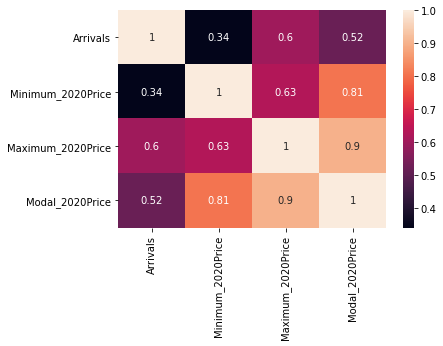

In [65]:
sns.heatmap(corr,annot=True)

In [34]:
# Simple Linear Regression
#Load function from sklearn
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
y = maha_wheat_df_['Maximum_2020Price']
x = maha_wheat_df_[['Arrivals']]
# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [35]:
regr.coef_

array([2.43795129])

In [36]:
regr.intercept_

2373.5480919075912

In [37]:
apmc_market=maha_wheat.drop(['Market','Arrival_Date','Variety'], axis=1)

In [38]:
apmc_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Arrivals           17438 non-null  int32
 1   Minimum_2020Price  17438 non-null  int64
 2   Maximum_2020Price  17438 non-null  int64
 3   Modal_2020Price    17438 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 476.9 KB


In [39]:
forecast_out = 30 #'n=30' days

#Create another column (the target ) shifted 'n' units up
apmc_market['Prediction'] = apmc_market[['Modal_2020Price']].shift(-forecast_out)
#print the new data set
print(apmc_market.tail())


       Arrivals  Minimum_2020Price  Maximum_2020Price  Modal_2020Price  \
17433         2               1455               1475             1465   
17434         1               1490               1490             1490   
17435         1               1300               1475             1388   
17436         2               1475               1475             1475   
17437         2               1510               1510             1510   

       Prediction  
17433         NaN  
17434         NaN  
17435         NaN  
17436         NaN  
17437         NaN  


In [40]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(apmc_market.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)


[[  10 2180 2300 2240]
 [  19 2220 2400 2310]
 [  10 2250 2400 2325]
 ...
 [   1 1420 2080 1710]
 [   1 1450 2070 1710]
 [   7 1450 1851 1530]]


In [41]:
y = np.array(apmc_market['Prediction'])
y = y[:-forecast_out]
print(y)

[2700. 2375. 2425. ... 1388. 1475. 1510.]


In [42]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(apmc_market.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[   3 1300 1525 1481]
 [   8 1201 1821 1480]
 [  14 1370 1750 1500]
 [   6 1400 1570 1500]
 [   1 1490 1571 1500]
 [  12 1400 1585 1500]
 [   4 1401 2222 1505]
 [  10 1400 1819 1500]
 [   3 1471 1899 1499]
 [   7 1471 1899 1499]
 [   2 1391 1601 1480]
 [   4 1452 1880 1500]
 [   3 1450 1515 1515]
 [   2 1427 1450 1427]
 [   3 1425 1876 1550]
 [   9 1350 1725 1475]
 [  11 1300 2000 1500]
 [   3 1485 1540 1513]
 [   4 1540 1540 1540]
 [   1 1530 1530 1530]
 [   1 1500 1500 1500]
 [   2 1460 1490 1475]
 [   2 1485 1520 1503]
 [   1 1510 1510 1510]
 [   2 1515 1515 1515]
 [   2 1455 1475 1465]
 [   1 1490 1490 1490]
 [   1 1300 1475 1388]
 [   2 1475 1475 1475]
 [   2 1510 1510 1510]]


In [45]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)


[1797.55968371 1794.14919641 1801.31263167 1802.75258052 1804.92538573
 1802.53033253 1801.75971151 1801.90545229 1803.31235209 1803.19343207
 1799.25036377 1803.07663754 1806.62460139 1791.68421375 1810.82936259
 1796.92422239 1799.09407137 1807.00702006 1812.70854824 1810.93786832
 1805.35825851 1800.29713908 1805.43135652 1807.21812845 1808.11833341
 1798.56450734 1803.49838857 1782.29124752 1800.67885366 1807.18839844]


In [46]:
X = DataFrame(maha_wheat, columns=['Arrivals'])
y = DataFrame(maha_wheat, columns=['Modal_2020Price'])

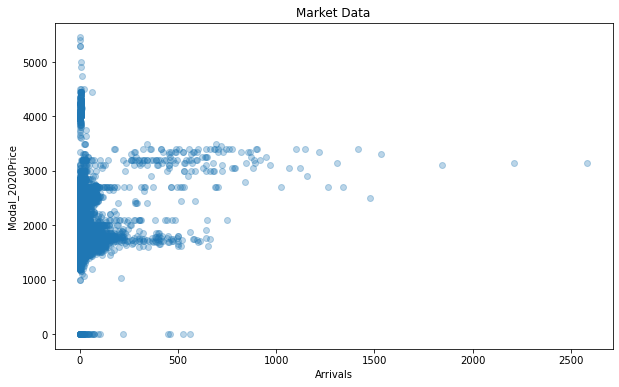

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title('Market Data')
plt.xlabel('Arrivals')
plt.ylabel('Modal_2020Price')
plt.show()

In [48]:
regression = LinearRegression()
regression.fit(X, y)
regression.coef_    # theta_1
#Intercept
regression.intercept_

array([1848.00377464])

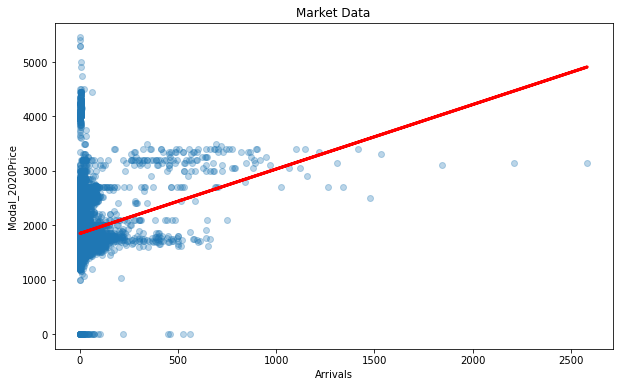

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)

plt.title('Market Data')
plt.xlabel('Arrivals')
plt.ylabel('Modal_2020Price')
plt.show()


### Time Series Forecasting - ARIMA Model

In [50]:
wheat_data=pd.read_csv('Maharashtra_2020_Wheat.csv',index_col='Arrival_Date',parse_dates=True)
wheat_data=wheat_data.dropna()
print('Shape of data',wheat_data.shape)
wheat_data.head()

Shape of data (1704, 6)


,Market,Arrivals,Variety,Minimum_2020Price,Maximum_2020Price,Modal_2020Price
Arrival_Date,,,,,,
2020-02-01,Achalpur,10.0,Other,2180,2300,2240
2020-01-01,Ahmednagar,1.0,Other,2650,2700,2675
2020-01-01,Ahmedpur,1.0,Other,1930,1930,1930
2020-01-01,Akluj,1.0,Other,2300,2300,2300
2020-01-01,Akola,6.0,Other,1925,2900,2700


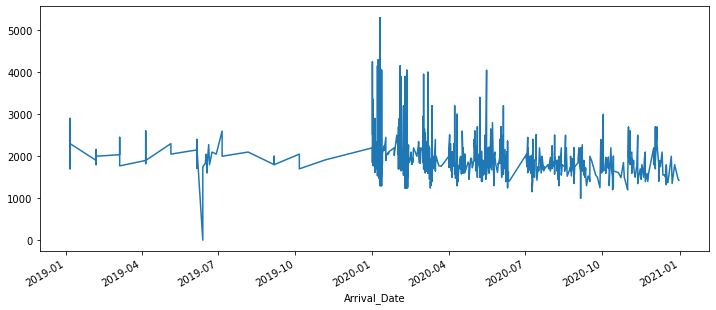

In [51]:
wheat_data['Modal_2020Price'].plot(figsize=(12,5))

In [52]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [53]:
adf_test(wheat_data['Modal_2020Price'])

1. ADF :  -2.916279623546985
2. P-Value :  0.04348738648684118
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1678
5. Critical Values :
	 1% :  -3.4342530582756807
	 5% :  -2.8632639794173427
	 10% :  -2.5676878033472508


In [54]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [55]:
stepwise_fit = auto_arima(wheat_data['Modal_2020Price'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1704
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -12371.797
Date:                Mon, 31 May 2021   AIC                          24747.593
Time:                        13:02:43   BIC                          24758.474
Sample:                             0   HQIC                         24751.621
                               - 1704                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9692      0.007   -129.942      0.000      -0.984      -0.955
sigma2      1.194e+05   1216.008     98.207      0.000    1.17e+05    1.22e+05
===================================================================================
Ljung-Box (Q):                       37.88   Jarque-Bera (JB):             36990.56
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             3.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
print(wheat_data.shape)
train=wheat_data.iloc[:-30]
test=wheat_data.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1704, 6)
(1674, 6) (30, 6)
Market                Selu
Arrivals                 1
Variety              Other
Minimum_2020Price     1350
Maximum_2020Price     1400
Modal_2020Price       1350
Name: 2020-12-23 00:00:00, dtype: object Market               Yeotmal
Arrivals                   3
Variety                Other
Minimum_2020Price       1485
Maximum_2020Price       1540
Modal_2020Price         1513
Name: 2020-01-12 00:00:00, dtype: object


In [58]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Modal_2020Price'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Modal_2020Price   No. Observations:                 1674
Model:                     ARMA(1, 5)   Log Likelihood              -12154.787
Method:                       css-mle   S.D. of innovations            344.304
Date:                Mon, 31 May 2021   AIC                          24325.574
Time:                        13:02:48   BIC                          24368.958
Sample:                             0   HQIC                         24341.648
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1890.3903    111.309     16.983      0.000    1672.228    2108.552
ar.L1.Modal_2020Price     0.9976      0.002    461.276      0.000       0.993       1.002
ma.L1.Modal_2020Price    -0.9828      0.025    -40.004      0.000      -1.031      -0.935
ma.L2.Modal_2020Price     0.0196      0.034      0.571      0.568      -0.048       0.087
ma.L3.Modal_2020Price     0.0039      0.034      0.115      0.908      -0.062       0.070
ma.L4.Modal_2020Price    -0.0019      0.035     -0.056      0.956      -0.071       0.067
ma.L5.Modal_2020Price    -0.0010      0.024     -0.040      0.968      -0.048       0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0024           +0.0000j            1.0024            0.0000
MA.1            1.0401           -0.0000j            1.0401           -0.0000
MA.2            3.3669           -3.7275j            5.0230           -0.1331
MA.3            3.3669           +3.7275j            5.0230            0.1331
MA.4           -4.9056           -3.9848j            6.3201           -0.3914
MA.5           -4.9056           +3.9848j            6.3201            0.3914
-----------------------------------------------------------------------------
"""

In [59]:
test['Modal_2020Price'].mean()

1676.0333333333333

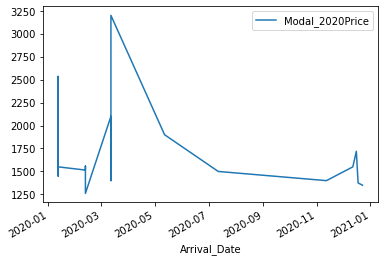

In [60]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
test['Modal_2020Price'].plot(legend=True)

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Modal_2020Price']))
print(rmse)

392.537405587696


In [62]:
model2=ARIMA(wheat_data['Modal_2020Price'],order=(1,0,5))
model2=model2.fit()


In [63]:
index_future_dates=pd.date_range(start='2021-05-01',end='2021-05-31')
pred=model2.predict(start=len(wheat_data),end=len(wheat_data)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2021-05-01    1703.509759
2021-05-02    1699.496171
2021-05-03    1700.353708
2021-05-04    1701.944768
2021-05-05    1702.418746
2021-05-06    1702.801576
2021-05-07    1703.183616
2021-05-08    1703.564867
2021-05-09    1703.945331
2021-05-10    1704.325009
2021-05-11    1704.703903
2021-05-12    1705.082015
2021-05-13    1705.459345
2021-05-14    1705.835897
2021-05-15    1706.211671
2021-05-16    1706.586669
2021-05-17    1706.960892
2021-05-18    1707.334343
2021-05-19    1707.707023
2021-05-20    1708.078933
2021-05-21    1708.450074
2021-05-22    1708.820450
2021-05-23    1709.190061
2021-05-24    1709.558908
2021-05-25    1709.926993
2021-05-26    1710.294319
2021-05-27    1710.660886
2021-05-28    1711.026696
2021-05-29    1711.391751
2021-05-30    1711.756051
2021-05-31    1712.119600
Freq: D, Name: ARIMA Predictions, dtype: float64


In [64]:
#pred.plot(figsize=(12,5),legend=True)
pred.mean()

1706.5387106689805